In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [4]:
# val_input = '/kaggle/input/trees-clf/hw_3_markup_data.txt'
# train_input = '/kaggle/input/trees-clf/train_data_hw5.tsv'

val_input = "/kaggle/input/trees-clf/hw_3_markup_data.txt"
train_input_1 = '/kaggle/input/trees-clf/train_data_hw5.tsv'
train_input_2 = '/kaggle/input/trees-clf/extra_data_hw5.tsv'

validation_data = pd.read_csv(val_input, sep='\t')
train_data_1 = pd.read_csv(train_input_1, sep='\t')
train_data_2 = pd.read_csv(train_input_2, sep='\t')
train_data = pd.concat([train_data_1, train_data_2], ignore_index=True)

In [5]:
validation_dict = {}
for _, row in validation_data.iterrows():
    url = row['downloadUrl']
    label = row['is_conifer']
    validation_dict[url] = label

In [6]:
train_data['true_label'] = train_data['INPUT:image'].map(validation_dict)
golden_data = train_data[train_data['GOLDEN:result'].notna()].copy()

In [7]:
golden_data

,INPUT:image,OUTPUT:result,GOLDEN:result,HINT:text,HINT:default_language,ASSIGNMENT:link,ASSIGNMENT:task_id,ASSIGNMENT:assignment_id,ASSIGNMENT:worker_id,ASSIGNMENT:status,ASSIGNMENT:started,ASSIGNMENT:submitted,true_label
0,https://new-projects-team-public.s3.yandex.net...,True,False,NaN,NaN,https://tasks.yandex.ru/task/5541621/0000548ef...,0000548ef5--693809fa1c0b1e506da2e3b2,0000548ef5--693819e66cad6f0284ef1add,24736b56d590c5d9d24c5a86485c26fa,APPROVED,2025-12-09T12:45:26.309,2025-12-09T12:45:39.510,False
10,https://new-projects-team-public.s3.yandex.net...,True,True,NaN,NaN,https://tasks.yandex.ru/task/5541621/0000548ef...,0000548ef5--693809fa1c0b1e506da2e3bc,0000548ef5--693819fca0effc61c250e4cb,24736b56d590c5d9d24c5a86485c26fa,APPROVED,2025-12-09T12:45:48.258,2025-12-09T12:45:58.912,True
24,https://new-projects-team-public.s3.yandex.net...,False,False,NaN,NaN,https://tasks.yandex.ru/task/5541621/0000548ef...,0000548ef5--693809fa1c0b1e506da2e3c0,0000548ef5--693819fdf30df95b3e77a075,6117719f6dd9341bf183a6e4dd28dcf2,APPROVED,2025-12-09T12:45:49.074,2025-12-09T12:46:04.796,False
35,https://new-projects-team-public.s3.yandex.net...,True,True,NaN,NaN,https://tasks.yandex.ru/task/5541621/0000548ef...,0000548ef5--693809fa1c0b1e506da2e371,0000548ef5--69381a0246bc102b0d9a5827,cb8718798c8a927a105206f8c2ea7c85,APPROVED,2025-12-09T12:45:54.648,2025-12-09T12:46:19.860,True
49,https://new-projects-team-public.s3.yandex.net...,False,False,NaN,NaN,https://tasks.yandex.ru/task/5541621/0000548ef...,0000548ef5--693809fa1c0b1e506da2e321,0000548ef5--69381a08ea870c753b655824,24736b56d590c5d9d24c5a86485c26fa,APPROVED,2025-12-09T12:46:00.037,2025-12-09T12:46:11.441,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,https://new-projects-team-public.s3.yandex.net...,True,True,NaN,NaN,https://tasks.yandex.ru/task/5561254/000054dba...,000054dba6--693e6a8d869ede62a3971664,000054dba6--693e71c1ac6cd60dd508629b,17fb69ef31ad552f5ccedef5239c26ea,APPROVED,2025-12-14T08:13:53.458,2025-12-14T08:14:10.784,True
7802,https://new-projects-team-public.s3.yandex.net...,False,True,NaN,NaN,https://tasks.yandex.ru/task/5561254/000054dba...,000054dba6--693e6a8d869ede62a3971668,000054dba6--693e71c4976e7b132ae54e9e,81094fc32b121ad37258132c73c009a4,APPROVED,2025-12-14T08:13:56.453,2025-12-14T08:14:07.673,True
7809,https://new-projects-team-public.s3.yandex.net...,False,False,NaN,NaN,https://tasks.yandex.ru/task/5561254/000054dba...,000054dba6--693e6a8d869ede62a3971639,000054dba6--693e71cebeb6106097e0f2b1,534b6e8f6d4ac0614fb54954f3f8b539,APPROVED,2025-12-14T08:14:06.856,2025-12-14T08:14:53.488,False
7818,https://new-projects-team-public.s3.yandex.net...,False,False,NaN,NaN,https://tasks.yandex.ru/task/5561254/000054dba...,000054dba6--693e6a8d869ede62a397163f,000054dba6--693e71d260aaac4d3d158f75,45741284351f8419ae0b04defdeb1e3f,APPROVED,2025-12-14T08:14:10.004,2025-12-14T08:14:27.759,False


In [8]:
golden_data['worker_answer'] = golden_data['OUTPUT:result']
golden_data['golden_answer'] = golden_data['GOLDEN:result']

In [9]:
golden_data['golden_answer'].unique()

array([False, True], dtype=object)

In [10]:
golden_data['worker_answer'].unique()

array([ True, False])

In [11]:
answers_df = golden_data[['ASSIGNMENT:task_id', 'ASSIGNMENT:worker_id', 'worker_answer']].copy()
answers_df.columns = ['task_id', 'worker_id', 'answer']

In [12]:
worker_performance = []
for worker_id in answers_df['worker_id'].unique():
    worker_data = golden_data[golden_data['ASSIGNMENT:worker_id'] == worker_id]
    if len(worker_data) > 0:
        accuracy = (worker_data['worker_answer'] == worker_data['golden_answer']).mean()
        worker_performance.append({
            'worker_id': worker_id,
            'skill_value': accuracy
        })

workers_skills = pd.DataFrame(worker_performance)

In [13]:
task_to_golden = golden_data.groupby('ASSIGNMENT:task_id')['golden_answer'].first().to_dict()

In [14]:
def majority_vote(answers: pd.DataFrame) -> pd.DataFrame:
    result = answers.groupby('task_id')['answer'].apply(lambda x: x.sum() > len(x) / 2).reset_index()
    result.columns = ['task_id', 'agg_answer']
    return result

In [15]:
def david_skene(answers: pd.DataFrame, max_iter=50) -> pd.DataFrame:
    tasks = answers['task_id'].unique()
    workers = answers['worker_id'].unique()
    
    task_to_idx = {task: idx for idx, task in enumerate(tasks)}
    worker_to_idx = {worker: idx for idx, worker in enumerate(workers)}
    
    n_tasks = len(tasks)
    n_workers = len(workers)
    
    response_matrix = np.full((n_tasks, n_workers), -1, dtype=np.int8)
    
    for _, row in answers.iterrows():
        task_idx = task_to_idx[row['task_id']]
        worker_idx = worker_to_idx[row['worker_id']]
        response_matrix[task_idx, worker_idx] = 1 if row['answer'] else 0
    
    p = np.zeros(n_tasks)
    for i in range(n_tasks):
        valid = response_matrix[i, :][response_matrix[i, :] >= 0]
        if len(valid) > 0:
            p[i] = valid.mean()
    
    confusion_matrices = np.zeros((n_workers, 2, 2))
    for j in range(n_workers):
        confusion_matrices[j] = np.array([[0.8, 0.2], [0.2, 0.8]])
    
    for iteration in range(max_iter):
        for i in range(n_tasks):
            prob_true = p[i] if p[i] > 0 else 0.5
            prob_false = 1 - prob_true
            
            log_prob_true = np.log(prob_true + 1e-10)
            log_prob_false = np.log(prob_false + 1e-10)
            
            for j in range(n_workers):
                if response_matrix[i, j] == -1:
                    continue
                
                r = response_matrix[i, j]
                log_prob_true += np.log(confusion_matrices[j, 1, r] + 1e-10)
                log_prob_false += np.log(confusion_matrices[j, 0, r] + 1e-10)
            
            max_log = max(log_prob_true, log_prob_false)
            prob_true_unnorm = np.exp(log_prob_true - max_log)
            prob_false_unnorm = np.exp(log_prob_false - max_log)
            
            p[i] = prob_true_unnorm / (prob_true_unnorm + prob_false_unnorm)
        
        for j in range(n_workers):
            confusion_matrices[j] = np.ones((2, 2)) * 0.1
            
            for i in range(n_tasks):
                if response_matrix[i, j] == -1:
                    continue
                
                r = response_matrix[i, j]
                confusion_matrices[j, 1, r] += p[i]
                confusion_matrices[j, 0, r] += (1 - p[i])
            
            confusion_matrices[j, 0, :] /= confusion_matrices[j, 0, :].sum()
            confusion_matrices[j, 1, :] /= confusion_matrices[j, 1, :].sum()
    
    result = pd.DataFrame({
        'task_id': tasks,
        'agg_answer': p > 0.5
    })
    
    return result

In [16]:
counts = train_data['ASSIGNMENT:task_id'].value_counts()
print(counts.value_counts())

count
3    1554
4     692
2      49
5      36
1      15
6      11
7       4
8       1
Name: count, dtype: int64


In [17]:
# алгоритм из ДЗ 4
def aggregation(answers: pd.DataFrame, workers_skills: pd.DataFrame) -> pd.DataFrame:
    
    answers = answers.merge(workers_skills, on='worker_id', how='left')
    answers['skill_value'] = answers['skill_value'].fillna(answers['skill_value'].median())
    
    tasks = answers['task_id'].unique()
    workers = answers['worker_id'].unique()
    n_tasks = len(tasks)
    n_workers = len(workers)
    
    task_to_idx = {task: idx for idx, task in enumerate(tasks)}
    worker_to_idx = {worker: idx for idx, worker in enumerate(workers)}
    
    response_matrix = np.full((n_tasks, n_workers), -1, dtype=np.int8)
    skill_vector = np.zeros(n_workers)
    
    for _, row in answers.iterrows():
        task_idx = task_to_idx[row['task_id']]
        worker_idx = worker_to_idx[row['worker_id']]
        response_matrix[task_idx, worker_idx] = 1 if row['answer'] else 0
        skill_vector[worker_idx] = row['skill_value']
    
    skill_min, skill_max = skill_vector.min(), skill_vector.max()
    if skill_max > skill_min:
        skill_norm = (skill_vector - skill_min) / (skill_max - skill_min)
    else:
        skill_norm = np.ones(n_workers) * 0.5
    
    mu = np.full(n_tasks, 0.5)
    
    alpha = np.full(n_workers, 0.8)
    beta_param = np.full(n_workers, 0.8)
    
    for j in range(n_workers):
        base_skill = 0.5 + 0.45 * skill_norm[j]
        alpha[j] = base_skill
        beta_param[j] = base_skill
    
    task_difficulty = np.zeros(n_tasks)
    
    task_counts = np.zeros(n_tasks)
    for i in range(n_tasks):
        valid_responses = response_matrix[i, :][response_matrix[i, :] >= 0]
        if len(valid_responses) > 0:
            mu[i] = valid_responses.mean()
            task_counts[i] = len(valid_responses)
    
    max_iterations = 100
    tolerance = 1e-7
    # фича с скорингом челов
    for iteration in range(max_iterations):
        old_mu = mu.copy()
        old_alpha = alpha.copy()
        old_beta = beta_param.copy()
        
        for i in range(n_tasks):
            prior_alpha = 2.0
            prior_beta = 2.0
            
            log_prob_y1 = 0
            log_prob_y0 = 0
            
            for j in range(n_workers):
                if response_matrix[i, j] == -1:
                    continue
                
                r_ij = response_matrix[i, j]
                
                if r_ij == 1:
                    prob_r_given_y1 = alpha[j]
                    prob_r_given_y0 = 1 - beta_param[j]
                else:
                    prob_r_given_y1 = 1 - alpha[j]
                    prob_r_given_y0 = beta_param[j]
                
                log_prob_y1 += np.log(prob_r_given_y1 + 1e-10)
                log_prob_y0 += np.log(prob_r_given_y0 + 1e-10)
            
            log_prior_y1 = (prior_alpha - 1) * np.log(0.5 + 1e-10)
            log_prior_y0 = (prior_beta - 1) * np.log(0.5 + 1e-10)
            
            log_prob_y1 += log_prior_y1
            log_prob_y0 += log_prior_y0
            
            max_log = max(log_prob_y1, log_prob_y0)
            prob_y1 = np.exp(log_prob_y1 - max_log)
            prob_y0 = np.exp(log_prob_y0 - max_log)
            
            mu[i] = prob_y1 / (prob_y1 + prob_y0)
            
            n_responses = np.sum(response_matrix[i, :] >= 0)
            if n_responses < 3:
                mu[i] = 0.7 * mu[i] + 0.3 * 0.5
        
        for j in range(n_workers):
            sum_mu = 0
            sum_1_minus_mu = 0
            sum_r_and_mu = 0
            sum_not_r_and_not_mu = 0
            count = 0
            
            for i in range(n_tasks):
                if response_matrix[i, j] == -1:
                    continue
                
                r_ij = response_matrix[i, j]
                mu_i = mu[i]
                
                sum_mu += mu_i
                sum_1_minus_mu += (1 - mu_i)
                
                if r_ij == 1:
                    sum_r_and_mu += mu_i
                else:
                    sum_not_r_and_not_mu += (1 - mu_i)
                
                count += 1
            
            if count > 0:
                smooth = 1.0
                
                alpha_new = (sum_r_and_mu + smooth) / (sum_mu + 2 * smooth)
                
                beta_new = (sum_not_r_and_not_mu + smooth) / (sum_1_minus_mu + 2 * smooth)
                
                skill_weight = 0.3
                alpha[j] = (1 - skill_weight) * alpha_new + skill_weight * (0.5 + 0.45 * skill_norm[j])
                beta_param[j] = (1 - skill_weight) * beta_new + skill_weight * (0.5 + 0.45 * skill_norm[j])
                
                alpha[j] = np.clip(alpha[j], 0.51, 0.99)
                beta_param[j] = np.clip(beta_param[j], 0.51, 0.99)
                
                accuracy = (sum_r_and_mu + sum_not_r_and_not_mu) / count
                if accuracy < 0.55:
                    alpha[j] = 0.51
                    beta_param[j] = 0.51
        
        for i in range(n_tasks):
            responses = response_matrix[i, response_matrix[i, :] >= 0]
            if len(responses) > 1:
                variance = np.var(responses)
                task_difficulty[i] = variance
        
        mu_change = np.max(np.abs(mu - old_mu))
        alpha_change = np.max(np.abs(alpha - old_alpha))
        beta_change = np.max(np.abs(beta_param - old_beta))
        
        if mu_change < tolerance and alpha_change < tolerance and beta_change < tolerance:
            break
    
    final_labels = np.zeros(n_tasks, dtype=bool)
    
    for i in range(n_tasks):
        n_responses = np.sum(response_matrix[i, :] >= 0)
        
        if n_responses >= 5:
            threshold = 0.5
        elif n_responses >= 3:
            threshold = 0.55
        else:
            threshold = 0.6
        
        if task_difficulty[i] > 0.2:
            threshold += 0.05
        
        final_labels[i] = mu[i] > threshold
    
    aggregated_result = pd.DataFrame({
        'task_id': tasks,
        'agg_answer': final_labels
    })
    
    aggregated_result = aggregated_result.sort_values('task_id').reset_index(drop=True)
    
    return aggregated_result[["task_id", "agg_answer"]]

In [18]:
mv_result = majority_vote(answers_df)
ds_result = david_skene(answers_df)
custom_result = aggregation(answers_df, workers_skills)

In [19]:
mv_result['golden'] = mv_result['task_id'].map(task_to_golden)
ds_result['golden'] = ds_result['task_id'].map(task_to_golden)
custom_result['golden'] = custom_result['task_id'].map(task_to_golden)

In [20]:
def evaluate_method(result_df, method_name):
    y_true = result_df['golden'].values
    y_pred = result_df['agg_answer'].values
    
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    print(f"\n{method_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    
    return {'method': method_name, 'accuracy': acc, 'f1': f1, 'precision': prec, 'recall': rec}

In [21]:
results = []
results.append(evaluate_method(mv_result, "Majority Vote"))
results.append(evaluate_method(ds_result, "David-Skene"))
results.append(evaluate_method(custom_result, "Custom Algorithm"))

results_df = pd.DataFrame(results)
results_df.head()


Majority Vote:
Accuracy: 0.7699
F1-score: 0.7045
Precision: 0.8611
Recall: 0.5962

David-Skene:
Accuracy: 0.7876
F1-score: 0.7500
Precision: 0.8182
Recall: 0.6923

Custom Algorithm:
Accuracy: 0.7832
F1-score: 0.7293
Precision: 0.8571
Recall: 0.6346


,method,accuracy,f1,precision,recall
0,Majority Vote,0.769912,0.704545,0.861111,0.596154
1,David-Skene,0.787611,0.750000,0.818182,0.692308
2,Custom Algorithm,0.783186,0.729282,0.857143,0.634615


In [22]:
mv_result = majority_vote(answers_df)
ds_result = david_skene(answers_df)
custom_result = aggregation(answers_df, workers_skills)

Comment: нам важен recall, поэтому будем использовать аггрегацию через David-Scene

In [23]:
ds_result

,task_id,agg_answer
0,0000548ef5--693809fa1c0b1e506da2e3b2,True
1,0000548ef5--693809fa1c0b1e506da2e3bc,True
2,0000548ef5--693809fa1c0b1e506da2e3c0,False
3,0000548ef5--693809fa1c0b1e506da2e371,True
4,0000548ef5--693809fa1c0b1e506da2e321,False
...,...,...
221,000054dba6--693e6a8d869ede62a3971668,False
222,000054dba6--693e6a8d869ede62a3971669,True
223,000054dba6--693e6a8d869ede62a397163a,False
224,000054dba6--693e6a8d869ede62a3971634,False


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [25]:
train_clean = train_data[train_data['GOLDEN:result'].isna()].copy()

In [26]:
train_clean['worker_answer'] = train_clean['OUTPUT:result']
train_answers = train_clean[['ASSIGNMENT:task_id', 'ASSIGNMENT:worker_id', 'worker_answer']].copy()
train_answers.columns = ['task_id', 'worker_id', 'answer']

In [27]:
aggregated_labels = david_skene(train_answers)

In [28]:
task_to_url = train_clean.groupby('ASSIGNMENT:task_id')['INPUT:image'].first().to_dict()
aggregated_labels['image_url'] = aggregated_labels['task_id'].map(task_to_url)

In [29]:
aggregated_labels.head()

,task_id,agg_answer,image_url
0,0000548ef5--693809b6d4e59077163241d0,True,https://new-projects-team-public.s3.yandex.net...
1,0000548ef5--6938098ed4e5907716323719,False,https://new-projects-team-public.s3.yandex.net...
2,0000548ef5--69380966d4e5907716322bbb,False,https://new-projects-team-public.s3.yandex.net...
3,0000548ef5--6938098ed4e59077163236a8,False,https://new-projects-team-public.s3.yandex.net...
4,0000548ef5--693809b6d4e59077163240c3,False,https://new-projects-team-public.s3.yandex.net...


In [30]:
aggregated_labels.agg_answer.value_counts()

agg_answer
False    1470
True      666
Name: count, dtype: int64

In [31]:
train_dataset = aggregated_labels[['image_url', 'agg_answer']].copy()
train_dataset.columns = ['url', 'label']
train_dataset['label'] = train_dataset['label'].astype(int)

In [32]:
validation_data.dropna(inplace = True)
validation_data

,is_conifer,downloadUrl
0,True,https://new-projects-team-public.s3.yandex.net...
1,False,https://new-projects-team-public.s3.yandex.net...
2,True,https://new-projects-team-public.s3.yandex.net...
3,False,https://new-projects-team-public.s3.yandex.net...
4,False,https://new-projects-team-public.s3.yandex.net...
...,...,...
195,True,https://new-projects-team-public.s3.yandex.net...
196,False,https://new-projects-team-public.s3.yandex.net...
197,True,https://new-projects-team-public.s3.yandex.net...
198,True,https://new-projects-team-public.s3.yandex.net...


In [33]:
val_dataset = validation_data[['downloadUrl', 'is_conifer']].copy()
val_dataset.columns = ['url', 'label']
val_dataset['label'] = val_dataset['label'].astype(int)

In [34]:
train_clean_1 = train_data_1[train_data_1['GOLDEN:result'].isna()].copy()
train_clean_1['worker_answer'] = train_clean_1['OUTPUT:result']
if train_clean_1['worker_answer'].dtype == object:
    train_clean_1['worker_answer'] = train_clean_1['worker_answer'].astype(str).str.upper() == 'TRUE'

answers_df_1 = train_clean_1[['ASSIGNMENT:task_id', 'ASSIGNMENT:worker_id', 'worker_answer']].copy()
answers_df_1.columns = ['task_id', 'worker_id', 'answer']

aggregated_labels_1 = david_skene(answers_df_1)
task_to_url_1 = train_clean_1.groupby('ASSIGNMENT:task_id')['INPUT:image'].first().to_dict()
aggregated_labels_1['image_url'] = aggregated_labels_1['task_id'].map(task_to_url_1)

task_votes = answers_df_1.groupby('task_id')['answer'].apply(list).to_dict()
aggregated_labels_1['unanimity'] = aggregated_labels_1['task_id'].map(
    lambda tid: len(set(task_votes.get(tid, []))) == 1 if tid in task_votes else False
)

aggregated_labels_1['vote_count'] = aggregated_labels_1['task_id'].map(
    lambda tid: len(task_votes.get(tid, [])) if tid in task_votes else 0
)
aggregated_labels_1['vote_sum'] = aggregated_labels_1['task_id'].map(
    lambda tid: sum(task_votes.get(tid, [])) if tid in task_votes else 0
)
aggregated_labels_1['vote_ratio'] = aggregated_labels_1['vote_sum'] / aggregated_labels_1['vote_count']
aggregated_labels_1['high_confidence'] = (
    aggregated_labels_1['unanimity'] |
    ((aggregated_labels_1['vote_count'] == 3) & (aggregated_labels_1['vote_ratio'].isin([0, 1, 1/3, 2/3])))
)

aggregated_labels_1_confident = aggregated_labels_1[aggregated_labels_1['high_confidence']].copy()

train_clean_2 = train_data_2[train_data_2['GOLDEN:result'].isna()].copy()
train_clean_2['worker_answer'] = train_clean_2['OUTPUT:result']
if train_clean_2['worker_answer'].dtype == object:
    train_clean_2['worker_answer'] = train_clean_2['worker_answer'].astype(str).str.upper() == 'TRUE'

answers_df_2 = train_clean_2[['ASSIGNMENT:task_id', 'ASSIGNMENT:worker_id', 'worker_answer']].copy()
answers_df_2.columns = ['task_id', 'worker_id', 'answer']

aggregated_labels_2 = david_skene(answers_df_2)
task_to_url_2 = train_clean_2.groupby('ASSIGNMENT:task_id')['INPUT:image'].first().to_dict()
aggregated_labels_2['image_url'] = aggregated_labels_2['task_id'].map(task_to_url_2)

final_labels = aggregated_labels_2[['image_url', 'agg_answer']].copy()

urls_in_pool_2 = set(aggregated_labels_2['image_url'].unique())
urls_in_pool_1_confident = set(aggregated_labels_1_confident['image_url'].unique())
urls_only_in_pool_1 = urls_in_pool_1_confident - urls_in_pool_2

if len(urls_only_in_pool_1) > 0:
    labels_from_pool_1 = aggregated_labels_1_confident[
        aggregated_labels_1_confident['image_url'].isin(urls_only_in_pool_1)
    ][['image_url', 'agg_answer']].copy()
    labels_from_pool_1 = labels_from_pool_1.drop_duplicates(subset=['image_url'], keep='last')
    final_labels = pd.concat([final_labels, labels_from_pool_1], ignore_index=True)

final_labels = final_labels.drop_duplicates(subset=['image_url'], keep='last')


print(f"{len(final_labels)} (Пул 2 {len(aggregated_labels_2)}, Пул 1 {len(labels_from_pool_1)})")
print(f"Метки {final_labels['agg_answer'].value_counts().to_dict()}")

train_dataset = final_labels.copy()
train_dataset.columns = ['url', 'label']
train_dataset['label'] = train_dataset['label'].astype(int)
print(train_dataset)

1500 (Пул 2 636, Пул 1 864)
Метки {False: 1142, True: 358}
                                                    url  label
0     https://new-projects-team-public.s3.yandex.net...      0
1     https://new-projects-team-public.s3.yandex.net...      1
2     https://new-projects-team-public.s3.yandex.net...      1
3     https://new-projects-team-public.s3.yandex.net...      1
4     https://new-projects-team-public.s3.yandex.net...      1
...                                                 ...    ...
1495  https://new-projects-team-public.s3.yandex.net...      1
1496  https://new-projects-team-public.s3.yandex.net...      0
1497  https://new-projects-team-public.s3.yandex.net...      0
1498  https://new-projects-team-public.s3.yandex.net...      0
1499  https://new-projects-team-public.s3.yandex.net...      0

[1500 rows x 2 columns]


In [35]:
def evaluate_pool_aggregation_with_results(aggregated_labels, pool_data, pool_name):
    golden_data = pool_data[pool_data['GOLDEN:result'].notna()].copy()
    if len(golden_data) == 0:
        print(f"{pool_name}: Нет golden-заданий")
        return None, None
    
    task_to_golden = golden_data.groupby('ASSIGNMENT:task_id')['GOLDEN:result'].first().to_dict()
    
    aggregated_labels_eval = aggregated_labels.copy()
    aggregated_labels_eval['golden'] = aggregated_labels_eval['task_id'].map(task_to_golden)
    aggregated_labels_eval = aggregated_labels_eval.dropna(subset=['golden'])
    
    if len(aggregated_labels_eval) == 0:
        print(f"{pool_name}: Нет пересечений")
        return None, None
    
    aggregated_labels_eval['golden'] = aggregated_labels_eval['golden'].astype(bool)
    aggregated_labels_eval['agg_answer'] = aggregated_labels_eval['agg_answer'].astype(bool)
    
    y_true = aggregated_labels_eval['golden'].values
    y_pred = aggregated_labels_eval['agg_answer'].values
    
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    
    print(f"{pool_name}: Acc: {acc:.4f}, F1: {f1:.4f}, Prec: {prec:.4f}, Rec: {rec:.4f}, N: {len(aggregated_labels_eval)}")
    
    return acc, len(aggregated_labels_eval)

pool_1_all = train_data_1.copy()
pool_1_all['worker_answer'] = pool_1_all['OUTPUT:result']
if pool_1_all['worker_answer'].dtype == object:
    pool_1_all['worker_answer'] = pool_1_all['worker_answer'].astype(str).str.upper() == 'TRUE'

answers_df_1_eval = pool_1_all[['ASSIGNMENT:task_id', 'ASSIGNMENT:worker_id', 'worker_answer']].copy()
answers_df_1_eval.columns = ['task_id', 'worker_id', 'answer']
aggregated_labels_1_eval = david_skene(answers_df_1_eval)

acc_1, count_1 = evaluate_pool_aggregation_with_results(aggregated_labels_1_eval, train_data_1, "пул 1")

pool_2_all = train_data_2.copy()
pool_2_all['worker_answer'] = pool_2_all['OUTPUT:result']
if pool_2_all['worker_answer'].dtype == object:
    pool_2_all['worker_answer'] = pool_2_all['worker_answer'].astype(str).str.upper() == 'TRUE'

answers_df_2_eval = pool_2_all[['ASSIGNMENT:task_id', 'ASSIGNMENT:worker_id', 'worker_answer']].copy()
answers_df_2_eval.columns = ['task_id', 'worker_id', 'answer']
aggregated_labels_2_eval = david_skene(answers_df_2_eval)

acc_2, count_2 = evaluate_pool_aggregation_with_results(aggregated_labels_2_eval, train_data_2, "пул 2")

if acc_1 is not None and acc_2 is not None:
    total_count = count_1 + count_2
    weighted_acc = (acc_1 * count_1 + acc_2 * count_2) / total_count
    
    print(f"Взвешенная Accuracy: {weighted_acc:.4f} (Пул 1: {acc_1:.4f}, Пул 2: {acc_2:.4f})")

if 'final_labels' in locals():
    golden_data_all = train_data[train_data['GOLDEN:result'].notna()].copy()
    url_to_golden = golden_data_all.groupby('INPUT:image')['GOLDEN:result'].first().to_dict()
    
    final_labels_eval = final_labels.copy()
    final_labels_eval['golden'] = final_labels_eval['image_url'].map(url_to_golden)
    final_labels_eval = final_labels_eval.dropna(subset=['golden'])
    
    if len(final_labels_eval) > 0:
        final_labels_eval['golden'] = final_labels_eval['golden'].astype(bool)
        final_labels_eval['agg_answer'] = final_labels_eval['agg_answer'].astype(bool)
        
        y_true = final_labels_eval['golden'].values
        y_pred = final_labels_eval['agg_answer'].values
        
        acc_final = accuracy_score(y_true, y_pred)
        f1_final = f1_score(y_true, y_pred, zero_division=0)
        prec_final = precision_score(y_true, y_pred, zero_division=0)
        rec_final = recall_score(y_true, y_pred, zero_division=0)
        
        print(f"Объединенный: Acc: {acc_final:.4f}, F1: {f1_final:.4f}, Prec: {prec_final:.4f}, Rec: {rec_final:.4f}, N: {len(final_labels_eval)}")

пул 1: Acc: 0.7346, F1: 0.7226, Prec: 0.7467, Rec: 0.7000, N: 162
пул 2: Acc: 0.9375, F1: 0.9167, Prec: 0.9167, Rec: 0.9167, N: 64
Взвешенная Accuracy: 0.7920 (Пул 1: 0.7346, Пул 2: 0.9375)
Объединенный: Acc: 0.8333, F1: 0.8889, Prec: 0.8000, Rec: 1.0000, N: 6


In [36]:
def download_image(url):
    try:
        response = requests.get(url, timeout=10)
        img = Image.open(BytesIO(response.content)).convert('RGB')
        return img
    except:
        return None

In [37]:
print("Downloading training images...")
train_images = []
train_labels = []

for idx, row in tqdm(train_dataset.iterrows(), total=len(train_dataset)):
    img = download_image(row['url'])
    if img is not None:
        train_images.append(img)
        train_labels.append(row['label'])

100%|██████████| 1500/1500 [12:41<00:00,  1.97it/s]


In [38]:
print("Downloading validation images...")
val_images = []
val_labels = []

for idx, row in tqdm(val_dataset.iterrows(), total=len(val_dataset)):
    img = download_image(row['url'])
    if img is not None:
        val_images.append(img)
        val_labels.append(row['label'])

100%|██████████| 200/200 [01:40<00:00,  1.99it/s]


In [95]:
from PIL import ImageEnhance

def augment_images(images, labels):
    augmented_images = []
    augmented_labels = []
    
    for img, label in tqdm(zip(images, labels), total=len(images), desc="Augmenting"):
        for rotation in [0, 90, 180, 270]:
            for brightness in [0.7, 1.0, 1.3]:
                img_aug = img.rotate(rotation, expand=True)
                
                enhancer = ImageEnhance.Brightness(img_aug)
                img_aug = enhancer.enhance(brightness)
                
                augmented_images.append(img_aug)
                augmented_labels.append(label)
    
    return augmented_images, augmented_labels

In [96]:
train_images_aug, train_labels_aug = augment_images(train_images, train_labels)
val_images_aug, val_labels_aug = augment_images(val_images, val_labels)

Augmenting: 100%|██████████| 200/200 [00:00<00:00, 824.38it/s]


In [97]:
indices = np.random.permutation(len(train_images_aug))
train_images_aug = [train_images_aug[i] for i in indices]
train_labels_aug = [train_labels_aug[i] for i in indices]

indices = np.random.permutation(len(val_images_aug))
val_images_aug = [val_images_aug[i] for i in indices]
val_labels_aug = [val_labels_aug[i] for i in indices]

print(f"Training samples: {len(train_images_aug)}")
print(f"Validation samples: {len(val_images_aug)}")

Training samples: 17976
Validation samples: 2400


In [98]:
class PreloadedDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            img = self.transform(img)
        
        return img, label

In [99]:
train_transform = transforms.Compose([
    transforms.Resize(320),
    transforms.RandomCrop(299),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(320),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [100]:
train_ds = PreloadedDataset(train_images_aug, train_labels_aug, transform=train_transform)
val_ds = PreloadedDataset(val_images_aug, val_labels_aug, transform=val_transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)

In [71]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [101]:
model = models.efficientnet_b7(weights='DEFAULT')
model.aux_logits = False

for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.classifier[-1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.2, inplace=True),
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 1)
)

model = model.to(device)

In [102]:
num_neg = (train_dataset['label'] == 0).sum()
num_pos = (train_dataset['label'] == 1).sum()
pos_weight_val = num_neg / num_pos

print(f"pos_weight: {pos_weight_val:.4f}")

pos_weight = torch.tensor([pos_weight_val]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

pos_weight: 3.1899


In [103]:
optimizer = optim.Adam(model.classifier.parameters(), lr=0.0003)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.99, patience=3) # turn off scheduler

In [75]:
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(loader, desc="Training"):
        images = images.to(device)
        labels = labels.float().to(device)
        
        optimizer.zero_grad()
        outputs = model(images).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        predictions = (torch.sigmoid(outputs) > 0.5).long()
        correct += (predictions == labels.long()).sum().item()
        total += labels.size(0)
    
    return running_loss / len(loader), correct / total

In [76]:
def validate(model, loader, device):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validation"):
            images = images.to(device)
            labels = labels.float().to(device)
            
            outputs = model(images).squeeze()
            probs = torch.sigmoid(outputs)
            predictions = (probs > 0.5).long()
            
            all_preds.extend(predictions.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.long().cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_probs)
    cm = confusion_matrix(all_labels, all_preds)
    
    return acc, f1, precision, recall, roc_auc, cm

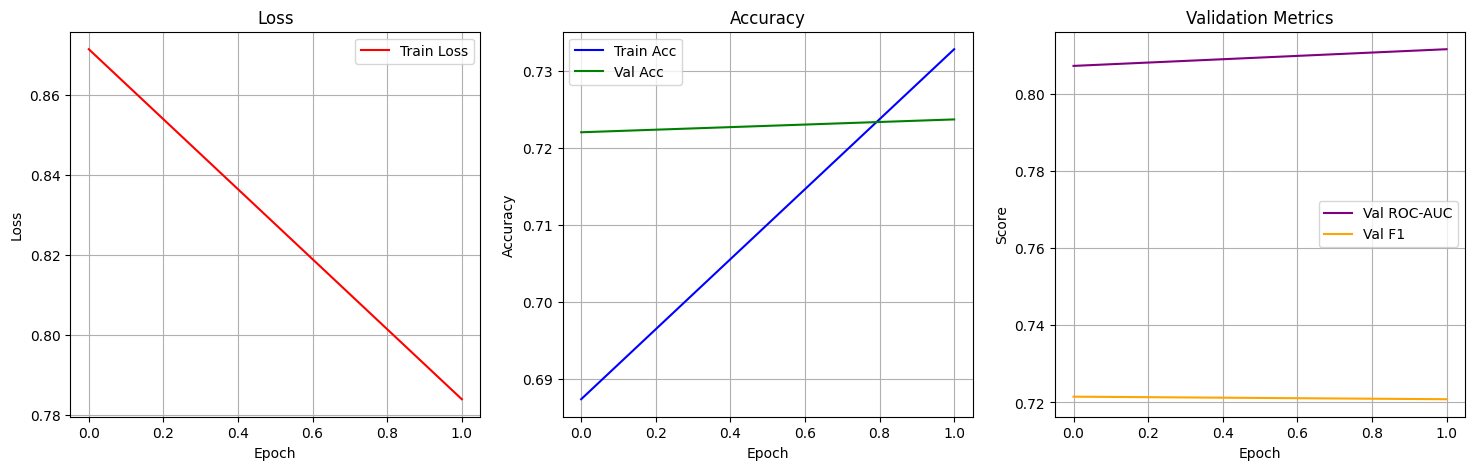

Epoch 2/40
Train Loss: 0.7839, Train Acc: 0.7329
Val Acc: 0.7238, F1: 0.7208
Val Precision: 0.7285, Recall: 0.7133
Val ROC-AUC: 0.8116
Confusion Matrix:
[[881 319]
 [344 856]]


Training:  57%|█████▋    | 321/562 [03:34<02:41,  1.50it/s]

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import datetime

num_epochs_head = 40
num_epochs_finetune = 30
best_val_acc = 0.0
best_roc_auc = 0.0

history = {
    'train_loss': [],
    'train_acc': [],
    'val_acc': [],
    'val_f1': [],
    'val_roc_auc': []
}

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

for epoch in range(num_epochs_head):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_acc, val_f1, val_precision, val_recall, val_roc_auc, val_cm = validate(model, val_loader, device)
    
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    history['val_f1'].append(val_f1)
    history['val_roc_auc'].append(val_roc_auc)
    
    clear_output(wait=True)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    axes[0].plot(history['train_loss'], label='Train Loss', color='red')
    axes[0].set_title('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(history['train_acc'], label='Train Acc', color='blue')
    axes[1].plot(history['val_acc'], label='Val Acc', color='green')
    axes[1].set_title('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True)
    
    axes[2].plot(history['val_roc_auc'], label='Val ROC-AUC', color='purple')
    axes[2].plot(history['val_f1'], label='Val F1', color='orange')
    axes[2].set_title('Validation Metrics')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Score')
    axes[2].legend()
    axes[2].grid(True)
    
    plt.show()
    
    print(f"Epoch {epoch+1}/{num_epochs_head}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
    print(f"Val Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")
    print(f"Val ROC-AUC: {val_roc_auc:.4f}")
    print(f"Confusion Matrix:\n{val_cm}")
    
    scheduler.step(val_acc)
    
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'val_acc': val_acc,
        'val_f1': val_f1,
        'val_roc_auc': val_roc_auc
    }
    torch.save(checkpoint, f'checkpoint_epoch_{epoch+1}.pth')
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(checkpoint, f'best_model_acc_{timestamp}.pth')
    
    if val_roc_auc > best_roc_auc:
        best_roc_auc = val_roc_auc
        torch.save(checkpoint, f'best_model_roc_auc_{timestamp}.pth')

for name, param in model.named_parameters():
    if 'features.7' in name or 'features.8' in name:
        param.requires_grad = True

optimizer_finetune = optim.Adam([
    {'params': model.classifier.parameters(), 'lr': 1e-4},
    {'params': [p for n, p in model.named_parameters() if 'features.7' in n or 'features.8' in n], 'lr': 1e-5}
], lr=1e-5)
scheduler_finetune = optim.lr_scheduler.ReduceLROnPlateau(optimizer_finetune, mode='max', factor=0.5, patience=3)

for epoch in range(num_epochs_finetune):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer_finetune, device)
    val_acc, val_f1, val_precision, val_recall, val_roc_auc, val_cm = validate(model, val_loader, device)
    
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    history['val_f1'].append(val_f1)
    history['val_roc_auc'].append(val_roc_auc)
    
    clear_output(wait=True)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    axes[0].plot(history['train_loss'], label='Train Loss', color='red')
    axes[0].set_title('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(history['train_acc'], label='Train Acc', color='blue')
    axes[1].plot(history['val_acc'], label='Val Acc', color='green')
    axes[1].set_title('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True)
    
    axes[2].plot(history['val_roc_auc'], label='Val ROC-AUC', color='purple')
    axes[2].plot(history['val_f1'], label='Val F1', color='orange')
    axes[2].set_title('Validation Metrics')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Score')
    axes[2].legend()
    axes[2].grid(True)
    
    plt.show()
    
    print(f"Fine-tuning Epoch {epoch+1}/{num_epochs_finetune}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
    print(f"Val Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")
    print(f"Val ROC-AUC: {val_roc_auc:.4f}")
    print(f"Confusion Matrix:\n{val_cm}")
    
    scheduler_finetune.step(val_acc)
    
    checkpoint = {
        'epoch': num_epochs_head + epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer_finetune.state_dict(),
        'val_acc': val_acc,
        'val_f1': val_f1,
        'val_roc_auc': val_roc_auc
    }
    torch.save(checkpoint, f'checkpoint_epoch_{num_epochs_head + epoch + 1}.pth')
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(checkpoint, f'best_model_acc_{timestamp}.pth')
    
    if val_roc_auc > best_roc_auc:
        best_roc_auc = val_roc_auc
        torch.save(checkpoint, f'best_model_roc_auc_{timestamp}.pth')

In [89]:
print(f"\nBest Validation Accuracy: {best_val_acc:.4f}")
print(f"Best Validation ROC-AUC: {best_roc_auc:.4f}")


Best Validation Accuracy: 0.7800
Best Validation ROC-AUC: 0.8447


In [90]:
checkpoint = torch.load('/kaggle/working/best_model_acc_20251217_135436.pth', weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])

val_acc, val_f1, val_precision, val_recall, val_roc_auc, val_cm = validate(model, val_loader, device)

print("\nFinal metrics on validation set (best ROC-AUC model):")
print(f"Accuracy: {val_acc:.4f}")
print(f"F1-score: {val_f1:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"ROC-AUC: {val_roc_auc:.4f}")
print(f"Confusion Matrix:\n{val_cm}")

Validation: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Final metrics on validation set (best ROC-AUC model):
Accuracy: 0.7800
F1-score: 0.7822
Precision: 0.7745
Recall: 0.7900
ROC-AUC: 0.8444
Confusion Matrix:
[[77 23]
 [21 79]]


### Making prediction

In [91]:
test_data = pd.read_excel('/kaggle/input/trees-clf/model_check.xlsx')
test_data.head()

,downloadUrl
0,https://new-projects-team-public.s3.yandex.net...
1,https://new-projects-team-public.s3.yandex.net...
2,https://new-projects-team-public.s3.yandex.net...
3,https://new-projects-team-public.s3.yandex.net...
4,https://new-projects-team-public.s3.yandex.net...


In [92]:

def download_image(url):
    try:
        response = requests.get(url, timeout=10)
        img = Image.open(BytesIO(response.content)).convert('RGB')
        return img
    except Exception as e:
        print(f"Error loading {url}: {e}")
        return None

In [93]:
model.eval()
model = model.to(device)

test_transform = transforms.Compose([
    transforms.Resize(320),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])




In [94]:
predictions = []
urls = []

for idx, row in tqdm(test_data.iterrows(), total=len(test_data)):
    url = row['downloadUrl']
    urls.append(url)
    
    img = download_image(url)
    if img is None:
        predictions.append(False)
        continue
    
    img_tensor = test_transform(img).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(img_tensor).squeeze()
        prob = torch.sigmoid(output).item()
        pred = prob > 0.5
        predictions.append(pred)


 12%|█▏        | 1339/11185 [12:12<1:29:44,  1.83it/s]


KeyboardInterrupt: 

In [ ]:
submission = pd.DataFrame({
    'downloadUrl': urls,
    'is_conifer': predictions
})

submission['is_conifer'] = submission['is_conifer'].map({True: 'TRUE', False: 'FALSE'})

submission.to_csv('submission_hw5_v1.csv', index=False)
print(f"\nSubmission file created with {len(submission)} predictions")
print(f"Predictions distribution:")
print(submission['is_conifer'].value_counts())


submission.head(10)